In [1]:
%matplotlib inline
from __future__ import print_function
import datetime
import numpy as np
import pandas as pd
from matplotlib import cm, pyplot as plt, finance
from matplotlib.dates import YearLocator, MonthLocator
from hmmlearn.hmm import GaussianHMM

C:\Users\bonnieb\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
###############################################################################
# Extracting quotes from Yahoo! finance
###############################################################################
ticker = "M&M.BO"
start_date = datetime.date(2007,12,26)
#end_date = datetime.date.today()
##end_date = datetime.date.today() - datetime.timedelta(days=15)
end_date = datetime.date(2017,12,27,)

In [3]:
from pandas_datareader import DataReader

In [4]:
quotes= DataReader("M&M.BO", 'yahoo', start_date, end_date)

In [5]:
quotes.reset_index(inplace=True,drop=False)
quotes.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-12-26,208.863007,212.475006,207.561996,208.386993,145.793076,460076.0
1,2007-12-27,210.000000,210.975006,205.000000,206.975006,144.805237,399748.0
2,2007-12-28,201.250000,209.949997,201.250000,208.600006,145.942108,233892.0
3,2007-12-31,207.800003,216.949997,207.800003,215.199997,150.559631,574668.0
4,2008-01-01,215.500000,218.000000,213.125000,216.212006,151.267685,221212.0


In [6]:
quotes.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2466,2017-12-20,777.250000,785.575012,765.025024,770.900024,770.900024,455948.0
2467,2017-12-21,765.000000,765.700012,739.500000,742.099976,742.099976,453947.0
2468,2017-12-22,745.000000,753.599976,744.000000,746.049988,746.049988,145162.0
2469,2017-12-26,746.049988,752.000000,737.000000,741.299988,741.299988,132001.0
2470,2017-12-27,746.950012,754.500000,740.150024,747.000000,747.000000,130028.0


In [7]:
quotes.drop(['Open','High','Low','Close'],axis=1,inplace=True)

In [8]:
quotes.head()

,Date,Adj Close,Volume
0,2007-12-26,145.793076,460076.0
1,2007-12-27,144.805237,399748.0
2,2007-12-28,145.942108,233892.0
3,2007-12-31,150.559631,574668.0
4,2008-01-01,151.267685,221212.0


In [9]:
##Find if there are any missing values
quotes.isnull().any()

Date         False
Adj Close     True
Volume        True
dtype: bool

In [10]:
##Missing value imputation
quotes = quotes.fillna(method='ffill')

In [11]:
##Convert Date to ordinal
quotes['Date'] = quotes['Date'].apply(datetime.datetime.toordinal)

In [12]:
quotes = list(quotes.itertuples(index=False, name=None))

In [13]:
quotes

[(733036, 145.79307600000001, 460076.0),
 (733037, 144.80523700000001, 399748.0),
 (733038, 145.94210800000002, 233892.0),
 (733041, 150.559631, 574668.0),
 (733042, 151.267685, 221212.0),
 (733043, 150.42811599999999, 226552.0),
 (733044, 146.16949499999998, 344608.0),
 (733045, 143.96565200000001, 685500.0),
 (733048, 141.779312, 282780.0),
 (733049, 145.18997199999998, 628148.0),
 (733050, 141.307098, 319500.0),
 (733051, 140.47662399999999, 328040.0),
 (733052, 135.50929299999999, 224452.0),
 (733055, 132.16854900000001, 419112.0),
 (733056, 128.38986200000002, 433168.0),
 (733057, 129.26438899999999, 637800.0),
 (733058, 131.599762, 229012.0),
 (733059, 127.40200800000001, 407128.0),
 (733062, 117.633118, 606896.0),
 (733063, 106.88544499999999, 665136.0),
 (733064, 110.72429699999999, 894700.0),
 (733065, 109.43068700000001, 1066532.0),
 (733066, 117.922073, 157260.0),
 (733069, 120.029335, 337996.0),
 (733070, 122.72359499999999, 424672.0),
 (733071, 120.868866, 221568.0),
 (733

In [14]:
# Unpack quotes
dates = np.array([q[0] for q in quotes], dtype=int)
close_v = np.array([q[1] for q in quotes])
volume = np.array([q[2] for q in quotes])[1:]

In [15]:
# Take diff of Adj close value. Note that this makes
# ``len(diff) = len(close_t) - 1``, therefore, other quantities also
# need to be shifted by 1.
diff = np.diff(close_v)
dates = dates[1:]
close_v = close_v[1:]

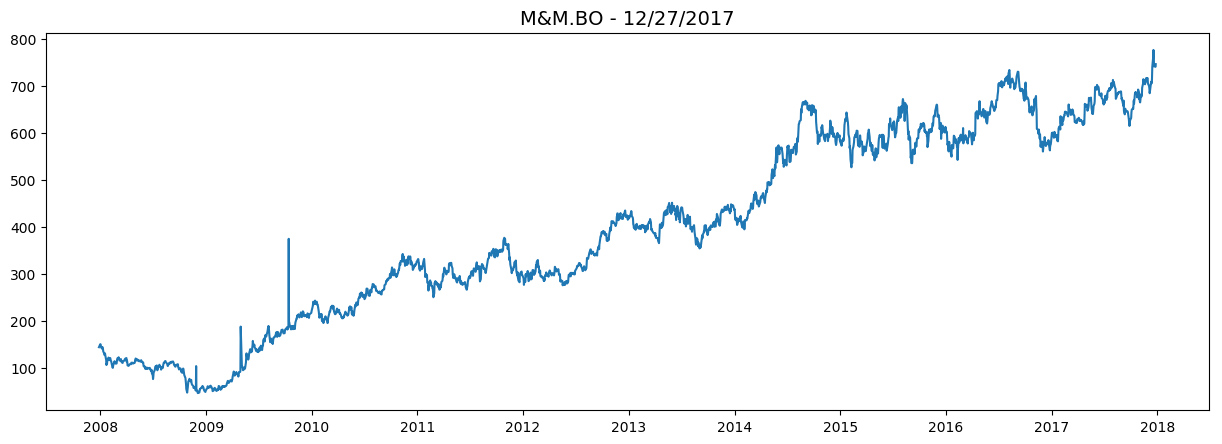

In [16]:
# Pack diff and volume for training.
X = np.column_stack([diff, volume])
plt.figure(figsize=(15, 5), dpi=100) 
plt.title(ticker + " - " + end_date.strftime("%m/%d/%Y"), fontsize = 14)
plt.gca().xaxis.set_major_locator(YearLocator())
plt.plot_date(dates,close_v,"-")
plt.show()

In [17]:
###############################################################################
# Run Gaussian HMM
###############################################################################
print("fitting to HMM and decoding ...", end="")
# Make an HMM instance and execute fit
model = GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000).fit(X)
# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X)
print("done")



fitting to HMM and decoding ...

C:\Users\bonnieb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\bonnieb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\bonnieb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\bonnieb\Anaconda3\lib\site-packages\hmmlearn\base.py:459: 

done


C:\Users\bonnieb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\bonnieb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\bonnieb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\bonnieb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Fu

In [18]:
###############################################################################
# Print trained parameters and plot
###############################################################################
print("Transition matrix - probability of going to any particular state")
print(model.transmat_)

print("Means and vars of each hidden state")
params = pd.DataFrame(columns=('State', 'Means', 'Variance'))
for i in range(model.n_components):
    params.loc[i] = [format(i), model.means_[i],np.diag(model.covars_[i])]

Transition matrix - probability of going to any particular state
[[  9.03394241e-001   6.51337643e-004   9.59544218e-002]
 [  1.00000000e+000   0.00000000e+000   1.00566354e-117]
 [  1.57939387e-001   1.65895088e-079   8.42060613e-001]]
Means and vars of each hidden state


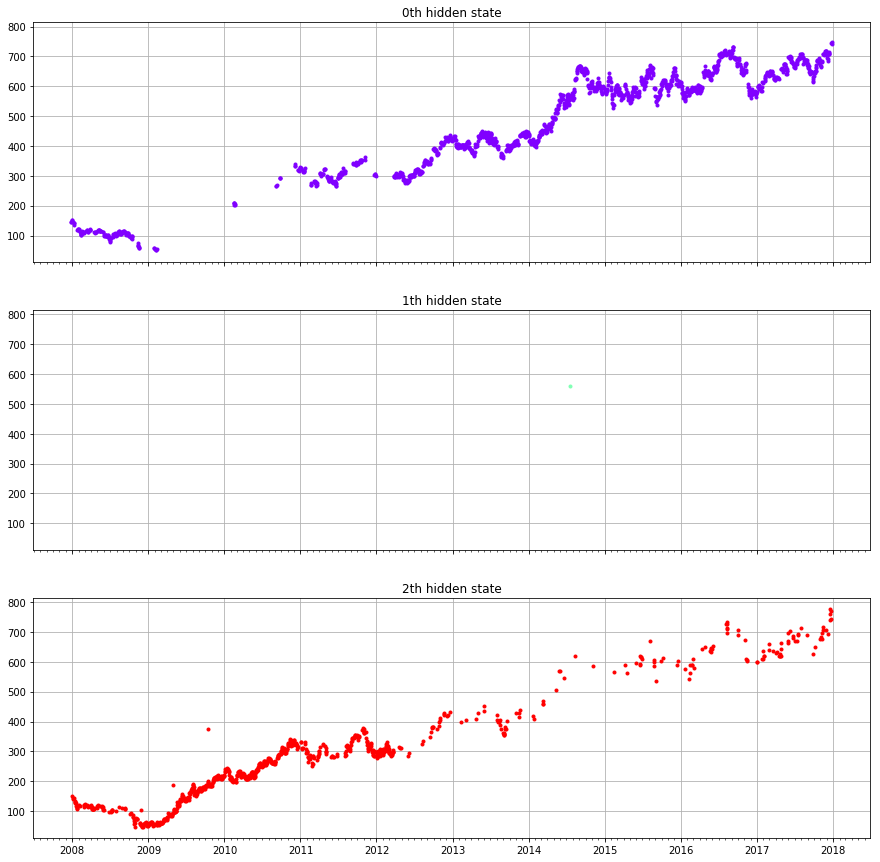

In [19]:
fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True, figsize=(15,15))
colours = cm.rainbow(np.linspace(0, 1, model.n_components))

for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(dates[mask], close_v[mask], ".", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)
plt.show()



In [20]:
#dot product Transition Matrix to Means to get the expected return and volumes for a particular state
expected_returns_and_volumes = np.dot(model.transmat_, model.means_)
returns_and_volume_columnwise = list(zip(*expected_returns_and_volumes))
expected_returns = returns_and_volume_columnwise[0]
expected_volumes = returns_and_volume_columnwise[1]
params = pd.concat([pd.Series(expected_returns), pd.Series(expected_volumes)], axis=1)
params.columns= ['Returns', 'Volume']
print (params)

    Returns         Volume
0 -0.030993  222453.593894
1 -0.120471  154614.161436
2  0.695865  596435.965243


In [21]:
#get quotes for last N days
lastN = 50
start_date = datetime.date.today() - datetime.timedelta(days=lastN*2) #even beyond N days
end_date = datetime.date.today() 

dates = np.array([q[0] for q in quotes], dtype=int)

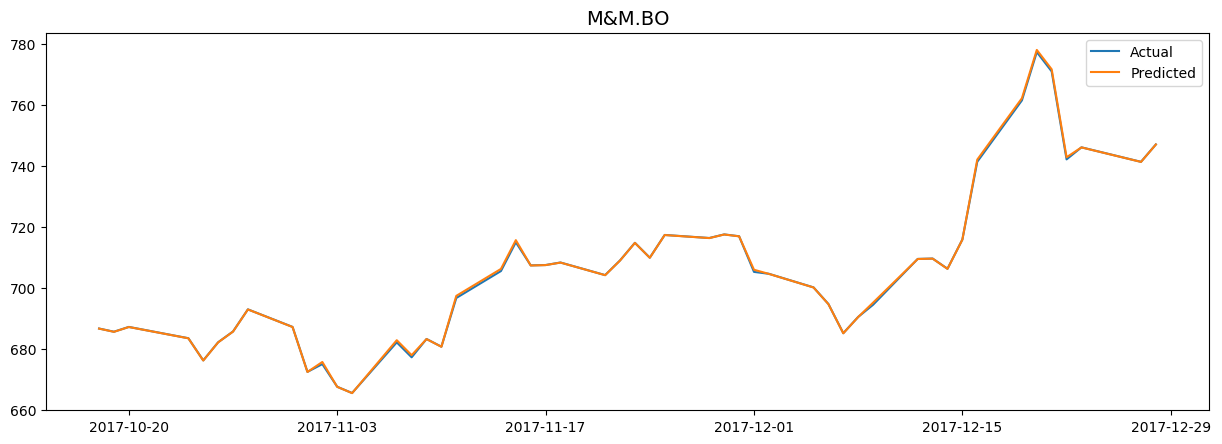

In [22]:
predicted_prices = []
predicted_dates = []

for idx in range(lastN):
    state = hidden_states[-lastN+idx]
    current_price = quotes[-lastN+idx][1]
    current_date = datetime.date.fromordinal(dates[-lastN+idx])
    predicted_date = current_date + datetime.timedelta(days=1)
    predicted_dates.append(predicted_date)
    predicted_prices.append(current_price + expected_returns[state])
     

#Returns
plt.figure(figsize=(15, 5), dpi=100) 
plt.title(ticker, fontsize = 14)
plt.plot(predicted_dates,close_v[-lastN:])
plt.plot(predicted_dates,predicted_prices)
plt.legend(['Actual','Predicted'])
plt.show()

In [30]:
print(predicted_prices)

[686.669018504257, 685.61903050425701, 687.19398250425695, 683.49403050425701, 676.21900650425698, 682.169018504257, 685.69398250425695, 692.94398250425695, 687.19398250425695, 672.46900650425698, 675.74585339029989, 667.59400650425698, 665.544018504257, 682.87085339029989, 677.97088939029993, 683.24403050425701, 680.71900650425698, 697.39587739029992, 706.22088939029993, 715.64587739029992, 707.34400650425698, 707.46900650425698, 708.294018504257, 704.169018504257, 708.96900650425698, 714.74403050425701, 709.86903050425701, 717.31898250425695, 716.31898250425695, 717.49403050425701, 716.89399450425697, 705.9458653902999, 704.59400650425698, 700.14399450425697, 694.69398250425695, 685.14399450425697, 690.46900650425698, 695.17084139029987, 709.46900650425698, 709.59400650425698, 706.24403050425701, 715.81898250425695, 742.02087739029992, 762.12085339029989, 777.9458653902999, 771.59588939029993, 742.79584139029987, 746.01899450425697, 741.26899450425697, 746.96900650425698]


In [38]:
predicted=pd.DataFrame(predicted_prices)
predicted
predicted.to_csv('C:\\Users\\bonnieb\\Desktop\\HMM\\mm.bo_predicted.csv')

In [ ]:
##End## updated as on 10-1-2018